# RTT Evaluation of Not Verified IP Addresses

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from numpy import genfromtxt
TUMDarkerBlue="#004b87"
TUMLighterBlue="#92c1e9"
TUMBlue="#005eb8"
print("Numpy version: {}".format(np.__version__))
import sys, subprocess
print("Python version: {}".format(sys.version))

Numpy version: 1.12.1
Python version: 3.6.1 (default, Apr  4 2017, 09:40:51) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]


In [4]:
PATH="../rtts-evaluation/" # modify PATH to point to the rtts-evaluation dataset

## IPv6

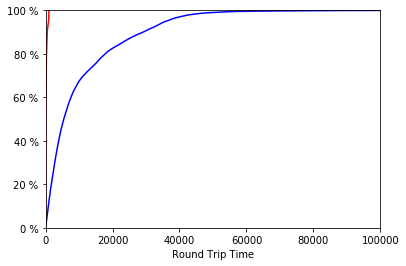

In [10]:
v6_ver_rtt_data = genfromtxt(PATH+'no-verification/ipv6-woip-wodist.rtts')
v6_ver_rtt_data = np.append(genfromtxt(PATH+'no-verification/ipv6-wip-wodist.rtts'), v6_ver_rtt_data)

v6_ver_wod_sorted_rtt_data = np.sort(v6_ver_rtt_data)
v6_ver_wod_y_values_rtt_data = np.arange(len(v6_ver_wod_sorted_rtt_data))/ \
    float(len(v6_ver_wod_sorted_rtt_data))*100
    
v6_ver_rtt_data = genfromtxt(PATH+'no-verification/ipv6-woip.dist')
v6_ver_rtt_data = np.append(genfromtxt(PATH+'no-verification/ipv6-wip.dist'), v6_ver_rtt_data)
v6_ver_d_sorted_rtt_data = np.sort(v6_ver_rtt_data)
v6_ver_d_y_values_rtt_data = np.arange(len(v6_ver_d_sorted_rtt_data))/ \
    float(len(v6_ver_d_sorted_rtt_data))*100

plt.plot(v6_ver_wod_sorted_rtt_data, v6_ver_wod_y_values_rtt_data, color='blue')
plt.plot(v6_ver_d_sorted_rtt_data, v6_ver_d_y_values_rtt_data, color='red')

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
plt.axis([0, 100000, 0, 100])
plt.xlabel('Round Trip Time')
plt.show()

## IPv4

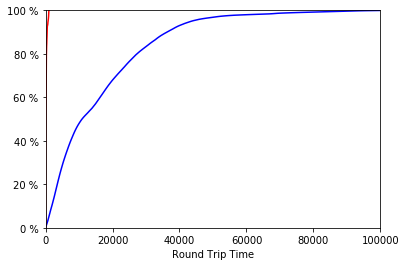

In [17]:
v6_ver_rtt_data = genfromtxt(PATH+'no-verification/ipv4-woip-wodist.rtts')
v6_ver_rtt_data = np.append(genfromtxt(PATH+'no-verification/ipv4-wip-wodist.rtts'), v6_ver_rtt_data)

v4_ver_wod_sorted_rtt_data = np.sort(v6_ver_rtt_data)
v4_ver_wod_y_values_rtt_data = np.arange(len(v4_ver_wod_sorted_rtt_data))/ \
    float(len(v4_ver_wod_sorted_rtt_data))*100
    
v6_ver_rtt_data = genfromtxt(PATH+'no-verification/ipv4-woip.dist')
v6_ver_rtt_data = np.append(genfromtxt(PATH+'no-verification/ipv4-wip.dist'), v6_ver_rtt_data)
v4_ver_d_sorted_rtt_data = np.sort(v6_ver_rtt_data)
v4_ver_d_y_values_rtt_data = np.arange(len(v4_ver_d_sorted_rtt_data))/ \
    float(len(v4_ver_d_sorted_rtt_data))*100

plt.plot(v4_ver_wod_sorted_rtt_data, v4_ver_wod_y_values_rtt_data, color='blue')
plt.plot(v4_ver_d_sorted_rtt_data, v4_ver_d_y_values_rtt_data, color='red')

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
plt.axis([0, 100000, 0, 100])
plt.xlabel('Round Trip Time')
plt.show()

## Merge

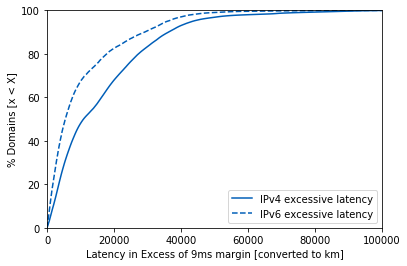

In [19]:
plt.plot(v4_ver_wod_sorted_rtt_data, v4_ver_wod_y_values_rtt_data, color=TUMBlue, label="IPv4 excessive latency")
plt.plot(v6_ver_wod_sorted_rtt_data, v6_ver_wod_y_values_rtt_data, color=TUMBlue, linestyle="dashed", label="IPv6 excessive latency")
plt.axis([0, 100000, 0, 100])
plt.xlabel("Latency in Excess of 9ms margin [converted to km]")
plt.ylabel("% Domains [x < X]")
plt.legend(loc="lower right")
plt.savefig('not_verified_rtts_eval.pdf', format='pdf', dpi=2000)
plt.show()

In [20]:
%%bash
FC="not_verified_rtts_eval-crop.pdf"
pdfcrop not_verified_rtts_eval.pdf $FC
rm not_verified_rtts_eval.pdf
#readlink -f $FC
open $FC
git add -f $FC

PDFCROP 1.38, 2012/11/02 - Copyright (c) 2002-2012 by Heiko Oberdiek.
==> 1 page written on `not_verified_rtts_eval-crop.pdf'.
